<a href="https://colab.research.google.com/github/sakaratsooksang/arphohub/blob/main/MANGROVES_DISCRIMINATION_2_13_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Senior Project/ASCII/after_clean/

/content/drive/MyDrive/Senior Project/ASCII/after_clean


In [2]:
%ls

amount_class.csv    TRAIN_SAMPLE16.csv  TRAIN_SAMPLE23.csv  TRAIN_SAMPLE30.csv
TEST.csv            TRAIN_SAMPLE17.csv  TRAIN_SAMPLE24.csv  TRAIN_SAMPLE3.csv
TRAIN_SAMPLE10.csv  TRAIN_SAMPLE18.csv  TRAIN_SAMPLE25.csv  TRAIN_SAMPLE4.csv
TRAIN_SAMPLE11.csv  TRAIN_SAMPLE19.csv  TRAIN_SAMPLE26.csv  TRAIN_SAMPLE5.csv
TRAIN_SAMPLE12.csv  TRAIN_SAMPLE1.csv   TRAIN_SAMPLE27.csv  TRAIN_SAMPLE6.csv
TRAIN_SAMPLE13.csv  TRAIN_SAMPLE20.csv  TRAIN_SAMPLE28.csv  TRAIN_SAMPLE7.csv
TRAIN_SAMPLE14.csv  TRAIN_SAMPLE21.csv  TRAIN_SAMPLE29.csv  TRAIN_SAMPLE8.csv
TRAIN_SAMPLE15.csv  TRAIN_SAMPLE22.csv  TRAIN_SAMPLE2.csv   TRAIN_SAMPLE9.csv


In [3]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from tqdm import tqdm

# Function Definition

ref values: a = 879 b = 1319 c = 1009 d = 1047 e = 1002

In [4]:
def assignClass(row):
  if row.ID > a+b+c+d:
    lable = 5
  elif row.ID > a+b+c:
    lable = 4
  elif row.ID > a+b:
    lable = 3
  elif row.ID > a:
    lable = 2
  else: lable = 1
  return lable
def dataCleaning(df,assign): 
  df['ID'] = np.arange(1,len(df)+1)
  df['Class'] = df.apply(assign, axis=1, raw=False)
  df.drop(['ID','X','Y','MapX','MapY','Lat','Lon'],axis=1,inplace=True)
  return df
def no_Pruining_Pipeline(x_train,y_train,x_test,y_test):
  model = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred).T)
  return model.score(x_test,y_test),model

# Train 30 Epoch

In [5]:
file_list = os.listdir()
amount_df = pd.read_csv('amount_class.csv').rename(
    columns={'Unnamed: 0':'filename'}
    ).set_index('filename')
test_df = pd.read_csv('TEST.csv')
test_df = test_df.drop(test_df.columns[0],axis=1)
a,b,c,d,e = amount_df.loc['TEST.txt']
test_df = dataCleaning(test_df,assignClass)
x_test,y_test = test_df.drop('Class',axis=1),test_df.Class
filename_list = []
score_list = []
model_list = []
for file in file_list:
  if (file == 'amount_class.csv') | (file=='TEST.csv'):
    continue
  else:
    print(file,'\n\n')  
    filename = file 
    a,b,c,d,e = amount_df.loc[file.replace('csv','txt')]
    train_df = pd.read_csv(file)
    train_df = train_df.drop(train_df.columns[0],axis=1)
    train_df = dataCleaning(train_df,assignClass)
    x_train,y_train = train_df.drop('Class',axis=1),train_df.Class
    print(y_train)
    model = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred).T)
    epoch_score = model.score(x_test,y_test)
    score_list.append(epoch_score)
    model_list.append(model)
    filename_list.append(filename)
    print('\n')
    


TRAIN_SAMPLE2.csv 


0      1
1      1
2      1
3      1
4      1
      ..
168    5
169    5
170    5
171    5
172    5
Name: Class, Length: 173, dtype: int64
              precision    recall  f1-score   support

           1       0.88      0.97      0.92        30
           2       0.96      0.98      0.97        44
           3       0.96      0.84      0.90        32
           4       0.92      0.89      0.91        27
           5       0.85      0.88      0.87        33

    accuracy                           0.92       166
   macro avg       0.91      0.91      0.91       166
weighted avg       0.92      0.92      0.92       166

[[29  1  1  0  2]
 [ 0 43  2  0  0]
 [ 1  0 27  0  0]
 [ 0  0  0 24  2]
 [ 0  0  2  3 29]]


TRAIN_SAMPLE3.csv 


0      1
1      1
2      1
3      1
4      1
      ..
168    5
169    5
170    5
171    5
172    5
Name: Class, Length: 173, dtype: int64
              precision    recall  f1-score   support

           1       0.92      0.80      0.86  

In [6]:
filename_list

['TRAIN_SAMPLE2.csv',
 'TRAIN_SAMPLE3.csv',
 'TRAIN_SAMPLE4.csv',
 'TRAIN_SAMPLE5.csv',
 'TRAIN_SAMPLE6.csv',
 'TRAIN_SAMPLE7.csv',
 'TRAIN_SAMPLE8.csv',
 'TRAIN_SAMPLE9.csv',
 'TRAIN_SAMPLE10.csv',
 'TRAIN_SAMPLE11.csv',
 'TRAIN_SAMPLE12.csv',
 'TRAIN_SAMPLE13.csv',
 'TRAIN_SAMPLE14.csv',
 'TRAIN_SAMPLE15.csv',
 'TRAIN_SAMPLE16.csv',
 'TRAIN_SAMPLE17.csv',
 'TRAIN_SAMPLE18.csv',
 'TRAIN_SAMPLE19.csv',
 'TRAIN_SAMPLE20.csv',
 'TRAIN_SAMPLE21.csv',
 'TRAIN_SAMPLE22.csv',
 'TRAIN_SAMPLE23.csv',
 'TRAIN_SAMPLE24.csv',
 'TRAIN_SAMPLE25.csv',
 'TRAIN_SAMPLE26.csv',
 'TRAIN_SAMPLE27.csv',
 'TRAIN_SAMPLE28.csv',
 'TRAIN_SAMPLE29.csv',
 'TRAIN_SAMPLE30.csv',
 'TRAIN_SAMPLE1.csv']

In [7]:
score_list

[0.9156626506024096,
 0.8313253012048193,
 0.8975903614457831,
 0.8855421686746988,
 0.927710843373494,
 0.8795180722891566,
 0.8795180722891566,
 0.9096385542168675,
 0.8975903614457831,
 0.8313253012048193,
 0.8795180722891566,
 0.8795180722891566,
 0.891566265060241,
 0.9096385542168675,
 0.8975903614457831,
 0.8373493975903614,
 0.9096385542168675,
 0.9156626506024096,
 0.8855421686746988,
 0.9216867469879518,
 0.8975903614457831,
 0.8674698795180723,
 0.8674698795180723,
 0.891566265060241,
 0.8795180722891566,
 0.8373493975903614,
 0.8795180722891566,
 0.8795180722891566,
 0.8855421686746988,
 0.891566265060241]

In [8]:
model_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(random_sta

In [9]:
res_dict = {
    'training_set':filename_list,
    'score':score_list
}
res_df = pd.DataFrame(res_dict)

In [10]:
res_df.sort_values(by='score',ascending=False)

,training_set,score
4,TRAIN_SAMPLE6.csv,0.927711
19,TRAIN_SAMPLE21.csv,0.921687
0,TRAIN_SAMPLE2.csv,0.915663
17,TRAIN_SAMPLE19.csv,0.915663
13,TRAIN_SAMPLE15.csv,0.909639
7,TRAIN_SAMPLE9.csv,0.909639
16,TRAIN_SAMPLE18.csv,0.909639
2,TRAIN_SAMPLE4.csv,0.897590
20,TRAIN_SAMPLE22.csv,0.897590
8,TRAIN_SAMPLE10.csv,0.897590


In [11]:
res_df.to_csv('/content/drive/MyDrive/Senior Project/result_30train.csv')

In [12]:
use_model = model_list[4]

In [13]:
use_model.score(x_test,y_test)

0.927710843373494

# Tree Visuallization

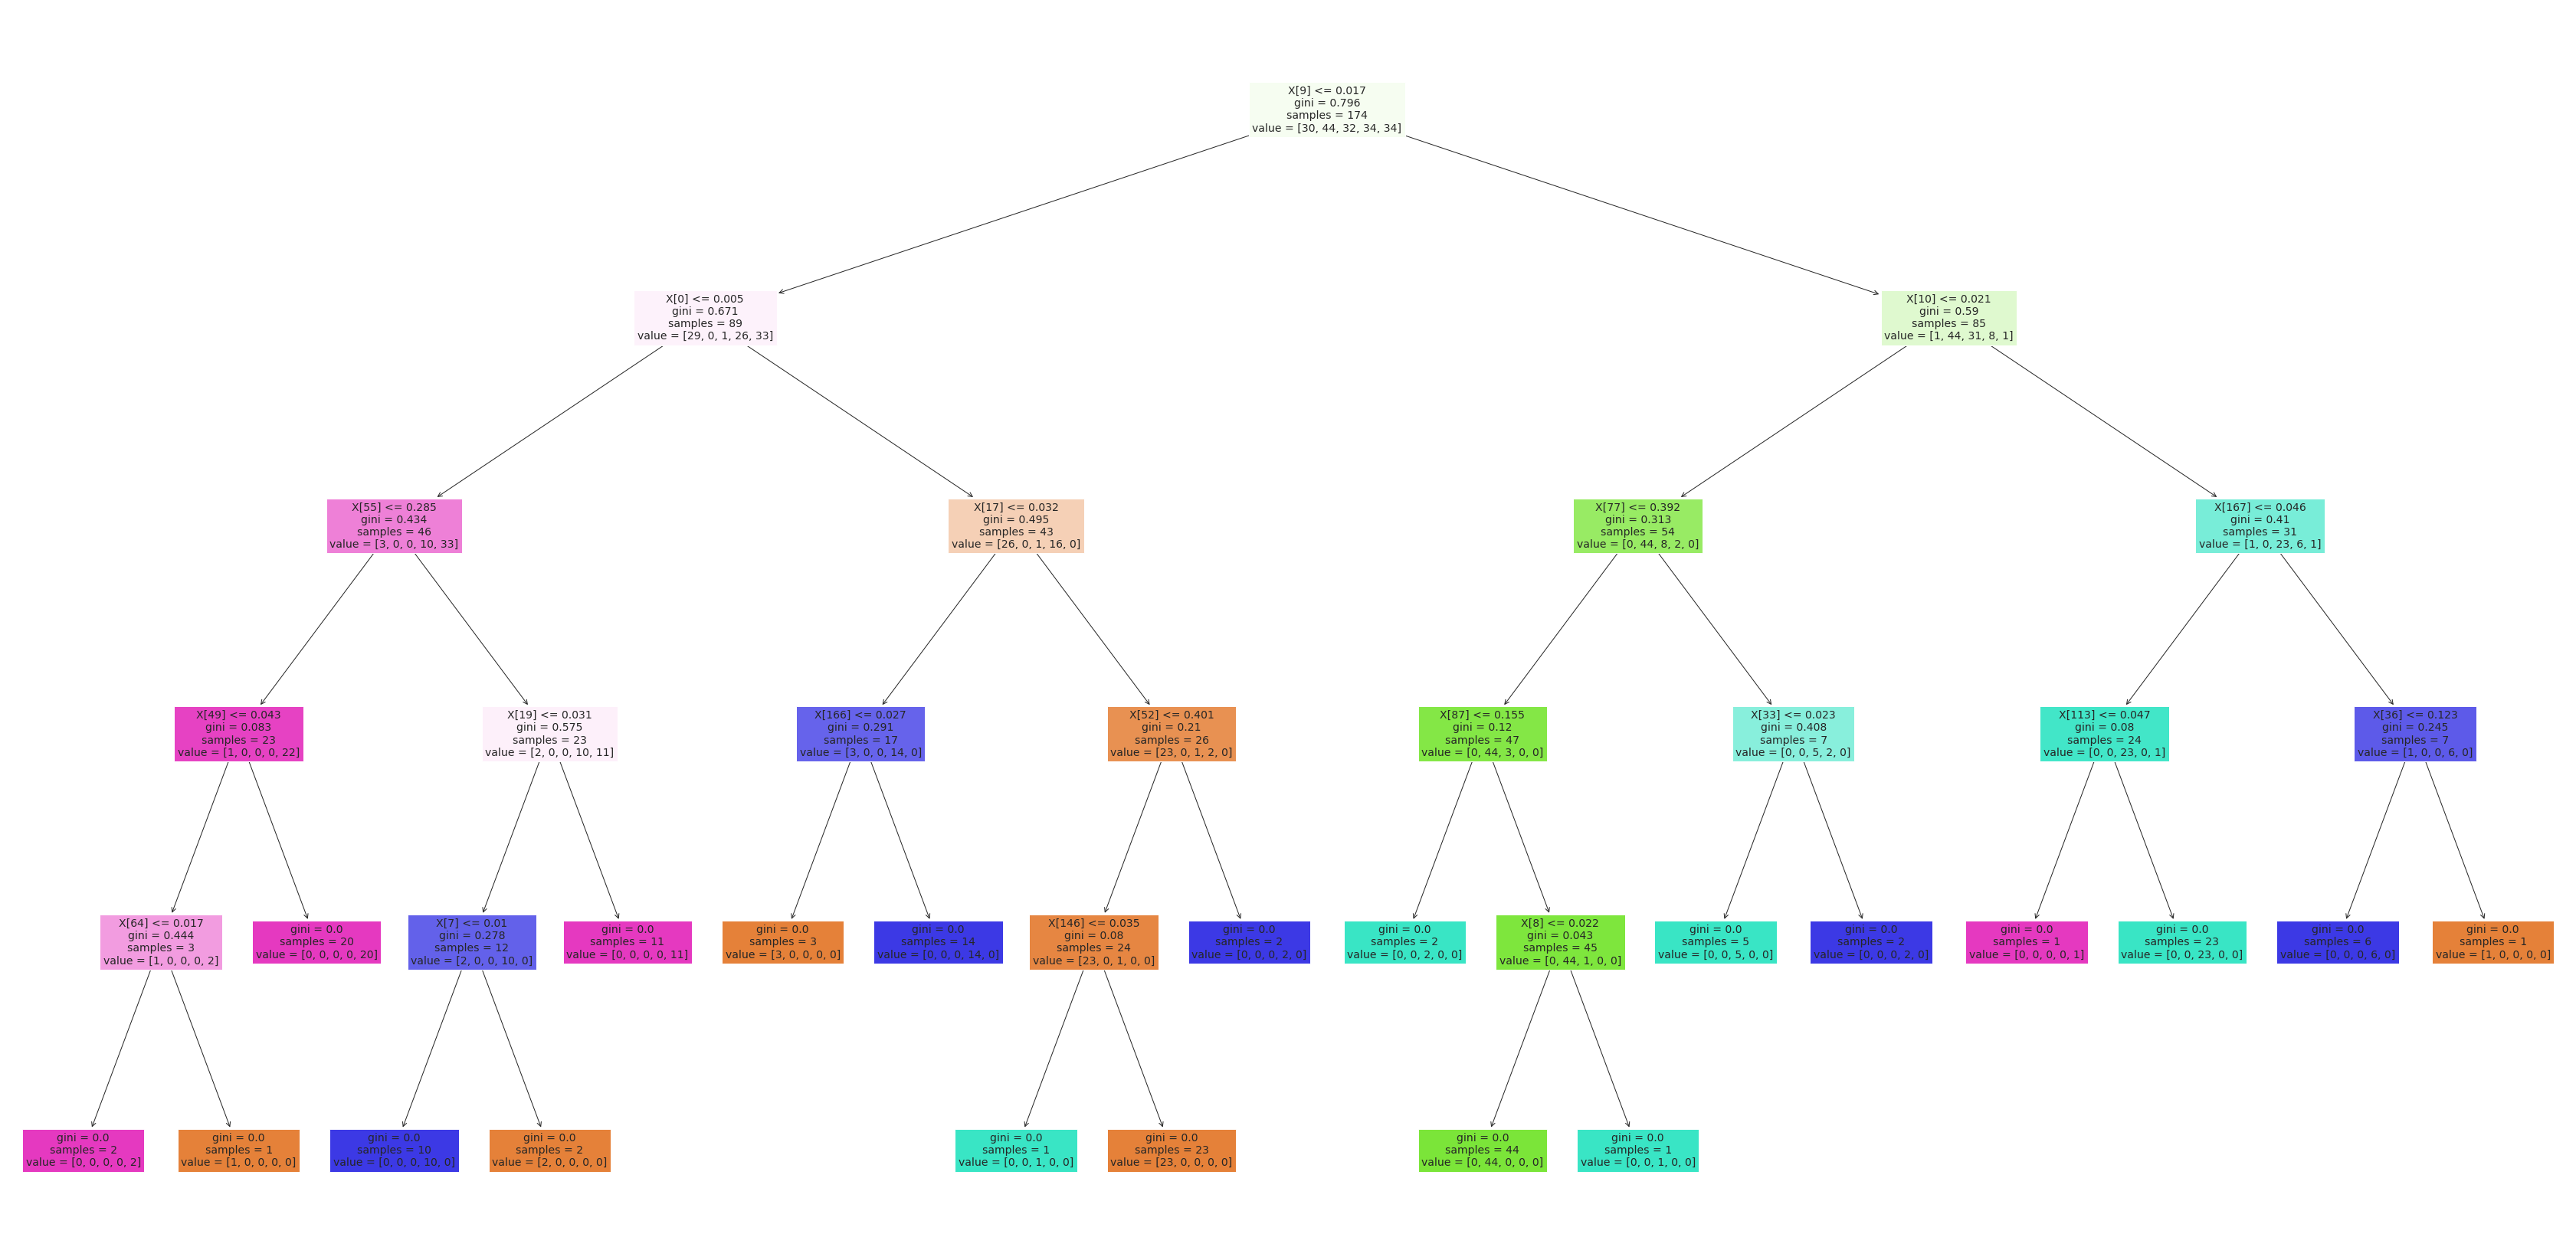

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(use_model, filled=True);

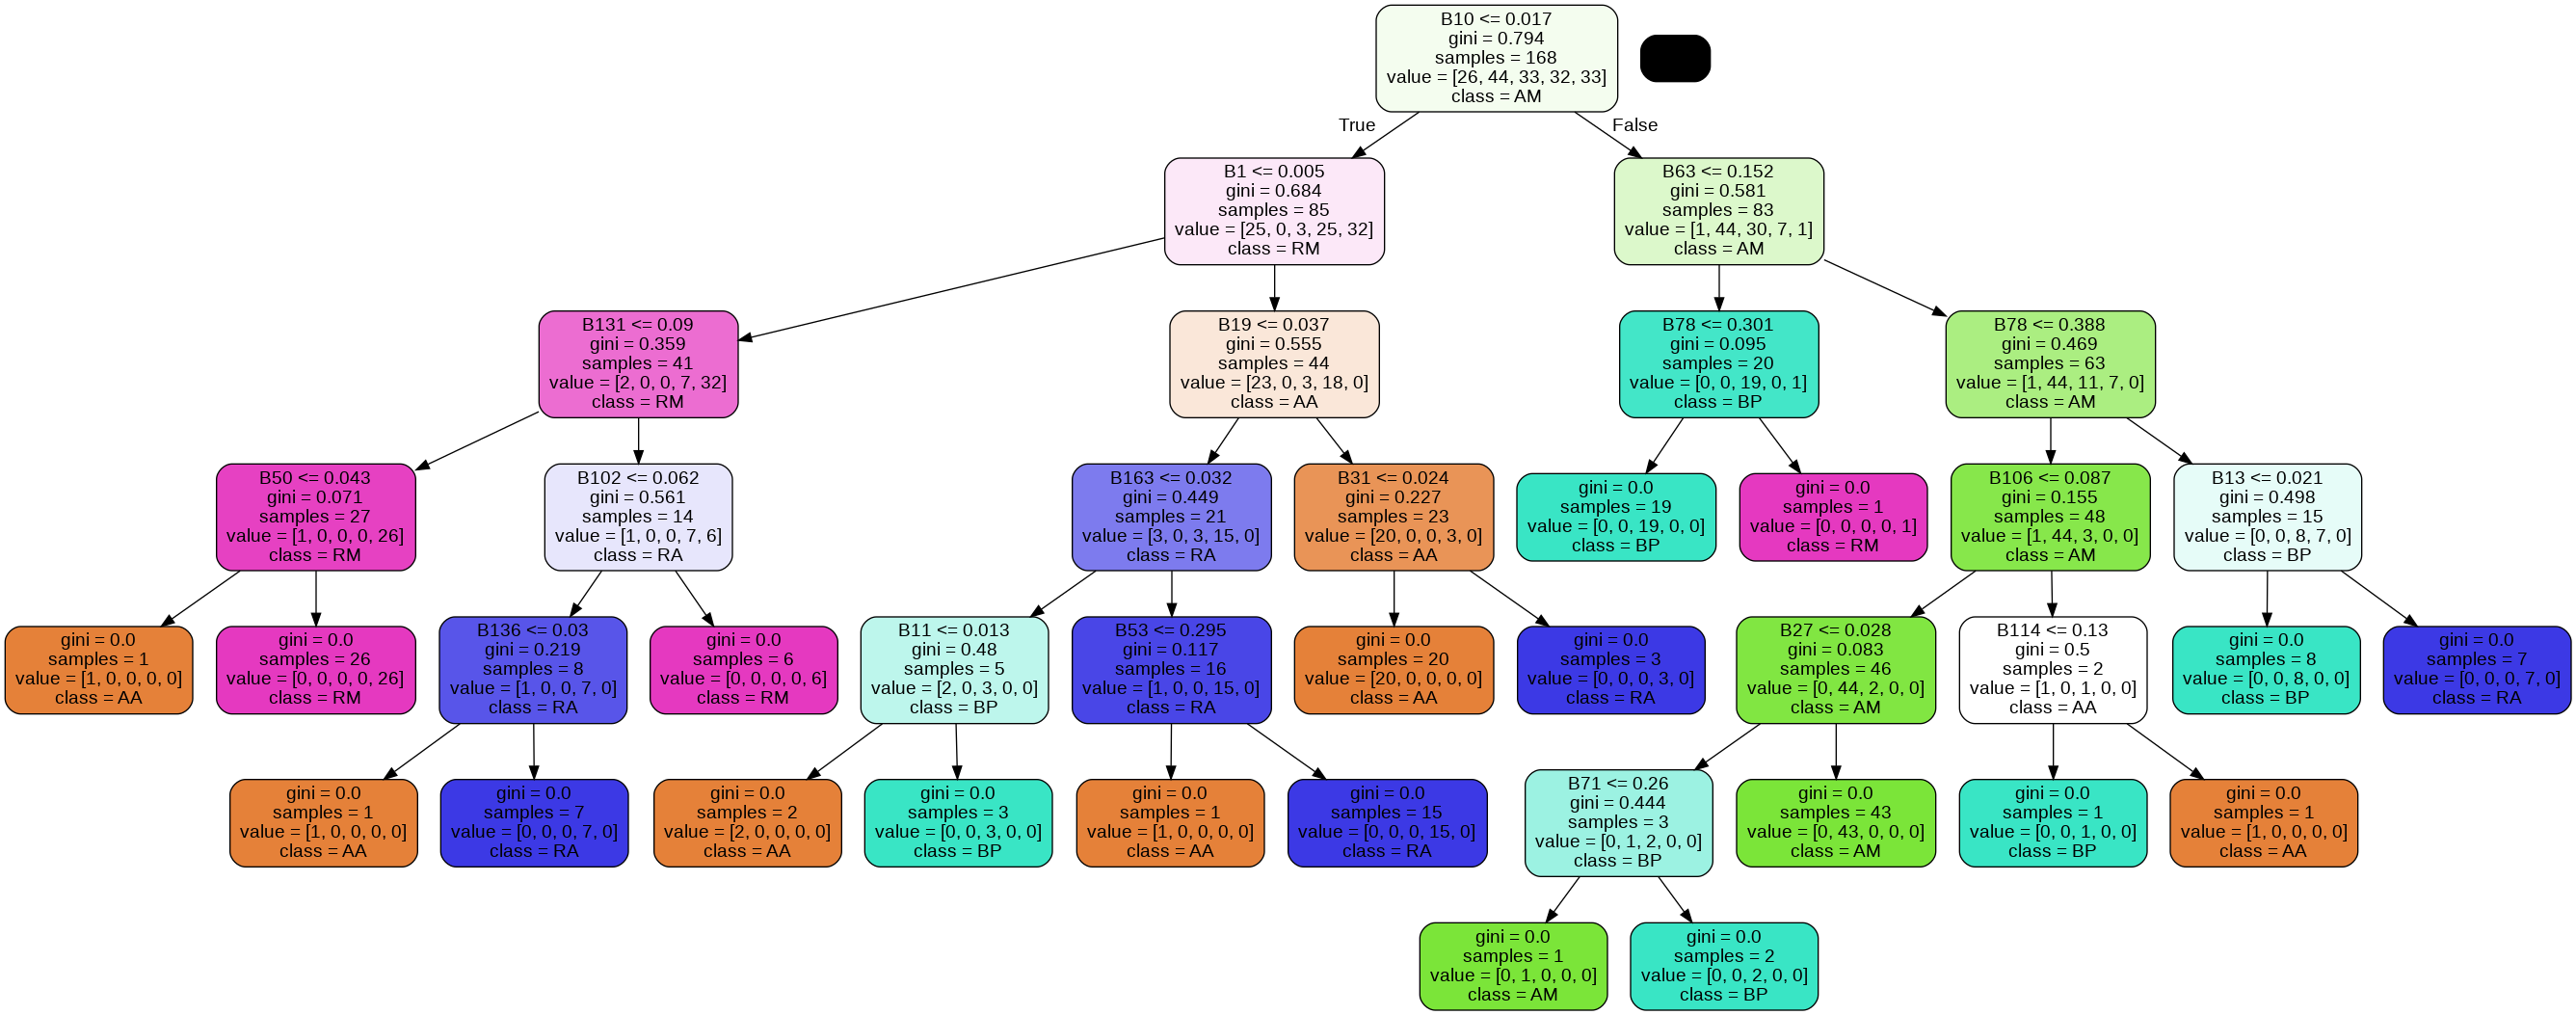

In [18]:
# Visualize DT
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source
dot_data = StringIO()
export_graphviz(
    model,out_file=dot_data,
    feature_names= x_train.columns,
    class_names = ['AA','AM','BP','RA','RM'],
    filled=True,rounded=True,special_characters=False
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())